In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline


from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout
from keras.utils import to_categorical

In [3]:
def make_X(mu, sigme, size):
    X = np.random.multivariate_normal(mu, sigme, size)
    return X

In [4]:
X1=0
X2=0

def make_data(mu, sigma, pi, size):
    global X1
    global X2
    
    sigma1 = sigma[0]
    sigma2 = sigma[1]
    mu1 = mu[0]
    mu2 = mu[1]
    pi1 = pi[0]
    pi2 = pi[1]

    X1_1 = make_X(mu1, sigma1, int(size*pi1))
    X1_2 = make_X(-mu1, sigma1, int(size*pi1))
    X1 = np.vstack((X1_1,X1_2))
    Y1 = np.full((1,len(X1)), 1)
    X2_1 = make_X(mu2, sigma2, int(size*pi2))
    X2_2 = make_X(-mu2, sigma2, int(size*pi2))
    X2 = np.vstack((X2_1,X2_2))
    Y2 = np.full((1,len(X2)), 0)
    
    X = np.vstack((X1,X2))
    Y = np.vstack((Y1,Y2))

    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])

    return X, Y.reshape(-1,1)

Step: 0 Loss: 153125.02 Accuracy 0.5
Step: 250 Loss: 149667.98 Accuracy 0.75
Step: 500 Loss: 149667.98 Accuracy 0.75
Step: 750 Loss: 149667.98 Accuracy 0.75
Step: 1000 Loss: 149667.98 Accuracy 0.75
(100,) (100,) (100,)


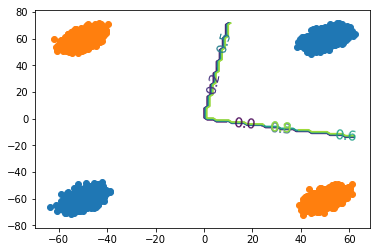

In [5]:
def make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1):
    global X1
    global X2
    
    etea = 1
    PI2 = 1 - PI1
    size = 10000
    
    X, Y = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)
    
    
    num_units = 2
    
    t = tf.placeholder(tf.float32, [None, 1], name='t')
    x = tf.placeholder(tf.float32, [None, 2], name='x')
    w1_1 = tf.Variable(tf.truncated_normal([2, num_units]))
    w1_0 = tf.Variable(tf.zeros([1]))
    h1 = tf.nn.relu(tf.matmul(x,w1_1)+w1_0)
    
    w2_1 = tf.Variable(tf.zeros([2, 1]))
    w2_0 = tf.Variable(tf.zeros([1]))
    y = tf.nn.sigmoid(tf.matmul(h1,w2_1)+w2_0)
    
    loss = -(tf.reduce_sum(t*tf.log(y+1e-13) + (1-t)*tf.log(1-y+1e-13)))
    train_step = tf.train.GradientDescentOptimizer(1).minimize(loss)
    correct_prediction = tf.equal(tf.sign(y-0.5), tf.sign(t-0.5))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    
    for i in range(1001):
        sess.run(train_step, feed_dict={x:X, t:Y})
        if i%250 == 0:
            loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:X, t:Y})
            print('Step:',i, 'Loss:',loss_val, 'Accuracy',acc_val)
        
    w1_1,w2_1,w1_0,w2_0 = sess.run([w1_1,w2_1,w1_0,w2_0])
    
    
    XX1 = np.linspace(X[:,0].min(),X[:,0].max(),100)
    XX2 = np.linspace(X[:,1].min(),X[:,1].max(),100)
    XX1_grid, XX2_grid = np.meshgrid(XX1, XX2)
    XX_grid = np.vstack((XX1_grid.flatten(),XX2_grid.flatten()))
    
    test_y = sess.run([y], feed_dict={x:XX_grid.T})
    
    print(XX1.shape, XX2.shape, np.diag(test_y[0][:,0].reshape((XX1.shape[0], XX1.shape[0]))).shape)
          
    cont = plt.contour(XX1, XX2, test_y[0][:,0].reshape((XX1.shape[0], XX1.shape[0])))
    cont.clabel(fmt='%1.1f', fontsize=14)

    
MU1 = np.array([50, 60])
SIGMA1 = np.array([[10, 5], [5, 10]])
PI1 = 0.5
MU2 = np.array([-50, 60])
SIGMA2 = np.array([[10, 5], [5, 10]])

make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1)
plt.show()

C:\Users\RAKUS\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step: 0 Loss: 138649.88 Accuracy 0.0
Step: 500 Loss: 138649.88 Accuracy 0.0
Step: 1000 Loss: 138649.88 Accuracy 0.0
Step: 1500 Loss: 138649.88 Accuracy 0.0
Step: 2000 Loss: 138649.88 Accuracy 0.0
(10000, 1)


C:\Users\RAKUS\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


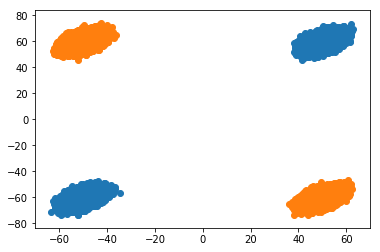

In [210]:
def make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1):
    global X1
    global X2
    
    etea = 1
    PI2 = 1 - PI1
    size = 100000
    
    X, Y = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)
    
    
    num_units = 2
    
    t = tf.placeholder(tf.float32, [None, 1], name='t')
    x = tf.placeholder(tf.float32, [None, 2], name='x')
    w1_1 = tf.Variable(tf.truncated_normal([2, num_units]))
    w1_0 = tf.Variable(tf.zeros([1]))
    h1 = tf.nn.relu(tf.matmul(x,w1_1) + w1_0)
    
    w2_1 = tf.Variable(tf.zeros([2, 1]))
    w2_0 = tf.Variable(tf.zeros([1]))
    h2 = tf.nn.relu(tf.matmul(h1,w2_1) + w2_0)
    
    w3_1 = tf.Variable(tf.zeros([2, 1]))
    w3_0 = tf.Variable(tf.zeros([1]))
    y = tf.nn.sigmoid(tf.matmul(h2,w3_1) + w3_0)
    
    loss = -(tf.reduce_sum(t*tf.log(y) + (1-t)*tf.log(1-y)))
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    correct_prediction = tf.equal(tf.sign(y-0.5), tf.sign(t-0.5))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    
    for i in range(2001):
        sess.run(train_step, feed_dict={x:X, t:Y})
        if i%500 == 0:
            loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:X, t:Y})
            print('Step:',i, 'Loss:',loss_val, 'Accuracy',acc_val)
        
    w1_1,w2_1,w1_0,w2_0 = sess.run([w1_1, w2_1, w1_0, w2_0])
    
    
    XX1 = np.linspace(X[:,0].min(),X[:,0].max(),100)
    XX2 = np.linspace(X[:,1].min(),X[:,1].max(),100)
    XX1_grid, XX2_grid = np.meshgrid(XX1, XX2)
    XX_grid = np.vstack((XX1_grid.flatten(),XX2_grid.flatten()))
    
    test_y = sess.run([y], feed_dict={x:XX_grid.T})
    
    print(test_y[0].shape)
          
    cont = plt.contour(XX1, XX2, test_y[0][:,0].reshape((XX1.shape[0], XX1.shape[0])))
    cont.clabel(fmt='%1.1f', fontsize=14)

    
MU1 = np.array([50, 60])
SIGMA1 = np.array([[10, 5], [5, 10]])
PI1 = 0.5
MU2 = np.array([-50, 60])
SIGMA2 = np.array([[10, 5], [5, 10]])

make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1)
plt.show()

Train on 1600000 samples, validate on 400000 samples
Epoch 1/10
1600000/1600000 [==============================] - 130s 82us/step - loss: 0.0142 - acc: 0.9954 - val_loss: 3.3542e-05 - val_acc: 1.0000
Epoch 2/10
1600000/1600000 [==============================] - 129s 80us/step - loss: 1.2935e-04 - acc: 1.0000 - val_loss: 1.4943e-05 - val_acc: 1.0000
Epoch 3/10
1600000/1600000 [==============================] - 130s 81us/step - loss: 6.7534e-05 - acc: 1.0000 - val_loss: 7.2343e-06 - val_acc: 1.0000
Epoch 4/10
1600000/1600000 [==============================] - 129s 81us/step - loss: 4.5595e-05 - acc: 1.0000 - val_loss: 8.3228e-06 - val_acc: 1.0000
Epoch 5/10
1600000/1600000 [==============================] - 143s 89us/step - loss: 3.5381e-05 - acc: 1.0000 - val_loss: 1.2650e-05 - val_acc: 1.0000
Epoch 6/10
1600000/1600000 [==============================] - 150s 94us/step - loss: 2.9734e-05 - acc: 1.0000 - val_loss: 1.2068e-05 - val_acc: 1.0000
Epoch 7/10
1600000/1600000 [=================

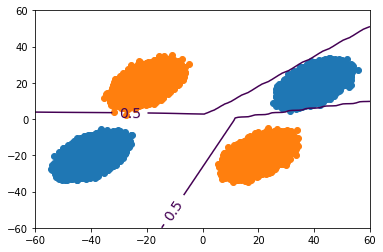

In [61]:
def make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1):
    global X1
    global X2
    
    etea = 1
    PI2 = 1 - PI1
    size = 1000000
    
    X, Y = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)
    Y_binary = to_categorical(Y)
    
    
    node_count = X.shape[1]
    hidden_count = 5
    
    model = Sequential()

    model.add(Dense(units=node_count, activation='relu', input_dim=node_count))
    #model.add(Activation('relu'))
    #model.add(Dropout(0.2))

    for index in range(hidden_count):
        model.add(Dense(units=4, activation='relu'))
        #model.add(Activation('relu'))
        #model.add(Dropout(0.2))

    model.add(Dense(units=2, activation='sigmoid'))
    #model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])
    
    hist = model.fit(X, Y_binary, validation_split=0.2, epochs=10)
    
    
    XX1 = np.linspace(-60, 60,100)
    XX2 = np.linspace(-60, 60,100)
    XX1_grid, XX2_grid = np.meshgrid(XX1, XX2)
    XX_grid = np.vstack((XX1_grid.flatten(),XX2_grid.flatten()))
    t_y = np.array(model.predict(XX_grid.T)[:,1])
    
    cont = plt.contour(XX1, XX2, t_y.T.reshape((XX1.shape[0], XX1.shape[0])), levels=[0.5])
    cont.clabel(fmt='%1.1f', fontsize=14)


    
    
    
    
    
    
MU1 = np.array([-40, -20])
SIGMA1 = np.array([[10, 5], [5, 10]])
PI1 = 0.5
MU2 = np.array([-20, 20])
SIGMA2 = np.array([[10, 5], [5, 10]])

make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1)
plt.show()

Train on 1600000 samples, validate on 400000 samples
Epoch 1/10
1600000/1600000 [==============================] - 472s 295us/step - loss: 0.0242 - acc: 0.9971 - val_loss: 0.0113 - val_acc: 0.9999
Epoch 2/10
1600000/1600000 [==============================] - 451s 282us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 3/10
1600000/1600000 [==============================] - 463s 289us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 4/10
1600000/1600000 [==============================] - 432s 270us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 5/10
1600000/1600000 [==============================] - 160s 100us/step - loss: 9.0698e-04 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 6/10
1600000/1600000 [==============================] - 158s 99us/step - loss: 7.3909e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 7/10
1600000/1600000 [==============================] - 168s 105us/ste

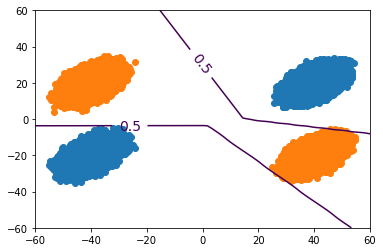

In [64]:
def make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1):
    global X1
    global X2
    
    etea = 1
    PI2 = 1 - PI1
    size = 5000000
    
    X, Y = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)
    Y_binary = to_categorical(Y)
    
    
    node_count = X.shape[1]
    hidden_count = 8
    
    model = Sequential()

    model.add(Dense(units=node_count, activation='relu', input_dim=node_count))
    #model.add(Activation('relu'))
    #model.add(Dropout(0.2))

    for index in range(hidden_count):
        model.add(Dense(units=4, activation='relu'))
        #model.add(Activation('relu'))
        #model.add(Dropout(0.2))

    model.add(Dense(units=2, activation='sigmoid'))
    #model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])
    
    hist = model.fit(X, Y_binary, validation_split=0.2, epochs=10)
    
    
    XX1 = np.linspace(-60, 60,100)
    XX2 = np.linspace(-60, 60,100)
    XX1_grid, XX2_grid = np.meshgrid(XX1, XX2)
    XX_grid = np.vstack((XX1_grid.flatten(),XX2_grid.flatten()))
    t_y = np.array(model.predict(XX_grid.T)[:,1])
    
    cont = plt.contour(XX1, XX2, t_y.T.reshape((XX1.shape[0], XX1.shape[0])), levels=[0.5])
    cont.clabel(fmt='%1.1f', fontsize=14)


    
    
    
    
    
    
MU1 = np.array([-40, -20])
SIGMA1 = np.array([[10, 5], [5, 10]])
PI1 = 0.5
MU2 = np.array([-40, 20])
SIGMA2 = np.array([[10, 5], [5, 10]])

make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1)
plt.show()

In [ ]:
def make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1):
    global X1
    global X2
    
    etea = 1
    PI2 = 1 - PI1
    size = 50000
    
    X, Y = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)
    Y_binary = to_categorical(Y)
    
    
    node_count = X.shape[1]
    hidden_count = 8
    
    model = Sequential()

    model.add(Dense(units=node_count, activation='relu', input_dim=node_count))
    #model.add(Activation('relu'))
    #model.add(Dropout(0.2))

    for index in range(hidden_count):
        model.add(Dense(units=4, activation='relu'))
        #model.add(Activation('relu'))
        #model.add(Dropout(0.2))

    model.add(Dense(units=2, activation='sigmoid'))
    #model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])
    
    hist = model.fit(X, Y_binary, validation_split=0.2, epochs=5)
    
    
    XX1 = np.linspace(-60, 60,100)
    XX2 = np.linspace(-60, 60,100)
    XX1_grid, XX2_grid = np.meshgrid(XX1, XX2)
    XX_grid = np.vstack((XX1_grid.flatten(),XX2_grid.flatten()))
    t_y = np.array(model.predict(XX_grid.T)[:,1])
    
    cont = plt.contour(XX1, XX2, t_y.T.reshape((XX1.shape[0], XX1.shape[0])), levels=[0.5])
    cont.clabel(fmt='%1.1f', fontsize=14)


    
    
    
    
    
    
MU1 = np.array([-40, -20])
SIGMA1 = np.array([[10, 5], [5, 10]])
PI1 = 0.5
MU2 = np.array([-40, 20])
SIGMA2 = np.array([[10, 5], [5, 10]])

make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1)
plt.show()

Epoch 1/5
1000000/1000000 [==============================] - 114s 114us/step - loss: 0.0181 - acc: 0.9993
Epoch 2/5
1000000/1000000 [==============================] - 113s 113us/step - loss: 1.3128e-07 - acc: 1.0000
Epoch 3/5
1000000/1000000 [==============================] - 113s 113us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 4/5
1000000/1000000 [==============================] - 111s 111us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 5/5
1000000/1000000 [==============================] - 113s 113us/step - loss: 1.0960e-07 - acc: 1.0000


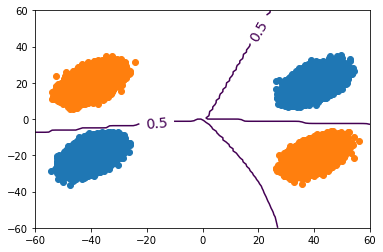

In [71]:
def make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1):
    global X1
    global X2
    
    etea = 1
    PI2 = 1 - PI1
    size = 500000
    
    X, Y = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)
    Y_binary = to_categorical(Y)
    
    
    node_count = X.shape[1]
    hidden_count = 8
    
    model = Sequential()

    model.add(Dense(units=node_count, activation='relu', input_dim=node_count))
    #model.add(Activation('relu'))
    #model.add(Dropout(0.2))

    for index in range(hidden_count):
        model.add(Dense(units=8, activation='relu'))
        #model.add(Activation('relu'))
        #model.add(Dropout(0.2))

    model.add(Dense(units=2, activation='sigmoid'))
    #model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    hist = model.fit(X, Y_binary, epochs=5)
    
    
    XX1 = np.linspace(-60, 60,100)
    XX2 = np.linspace(-60, 60,100)
    XX1_grid, XX2_grid = np.meshgrid(XX1, XX2)
    XX_grid = np.vstack((XX1_grid.flatten(),XX2_grid.flatten()))
    t_y = np.array(model.predict(XX_grid.T)[:,1])
    
    cont = plt.contour(XX1, XX2, t_y.T.reshape((XX1.shape[0], XX1.shape[0])), levels=[0.5])
    cont.clabel(fmt='%1.1f', fontsize=14)


    
    
    
    
    
    
MU1 = np.array([-40, -20])
SIGMA1 = np.array([[10, 5], [5, 10]])
PI1 = 0.5
MU2 = np.array([-40, 20])
SIGMA2 = np.array([[10, 5], [5, 10]])

make_glaf(MU1, MU2, SIGMA1, SIGMA2, PI1)
plt.show()